In [90]:
import pandas as pd
import numpy as np
import re
import seaborn as sns

In [72]:
data = open("data.txt", encoding="utf-8")

In [73]:
texts = data.readlines()
# texts

In [74]:
# data = list(map(lambda x: re.split(", | - |: ", x)))
texts = list(map(lambda x: x.strip("\n"), texts))
# texts

In [75]:
data = list(map(lambda x: re.split(", | - |: ", x), texts))
# data

In [76]:
data = list(map(lambda x: [" ".join(x[:2])] + x[2:], data))
# data

In [77]:
cols = ["DateTime", "SentBy", "Message"]

In [78]:
df = pd.DataFrame(data)

In [80]:
df = df.transpose()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,09/12/18 9:50 pm,Aaditya Verma,She had landed,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,09/12/18 9:50 pm,Aaditya Verma,Has,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,09/12/18 9:50 pm,Aaditya Verma,*,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,09/12/18 9:51 pm,Sweta Sahu,U dont need ro xrct,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,09/12/18 9:51 pm,Sweta Sahu,Iff,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [81]:
df.drop([i for i in range(3, 35)], axis=1, inplace=True)

In [82]:
df.columns = cols

In [106]:
df.head(10)

,DateTime,SentBy,Message
0,2018-09-12 21:50:00,Aaditya Verma,She had landed
1,2018-09-12 21:50:00,Aaditya Verma,Has
2,2018-09-12 21:50:00,Aaditya Verma,*
3,2018-09-12 21:51:00,Sweta Sahu,U dont need ro xrct
4,2018-09-12 21:51:00,Sweta Sahu,Iff
5,2018-09-12 21:51:00,Sweta Sahu,When my typing issssssss
6,2018-09-12 21:51:00,Sweta Sahu,Aaaah
7,2018-09-12 21:51:00,Sweta Sahu,🌶🌶🌶
8,2018-09-12 21:51:00,Aaditya Verma,🤣🤣🤣
9,2018-09-12 21:51:00,Sweta Sahu,🤣


In [88]:
df = df[df["DateTime"].apply(lambda x: len(x) < 17)]

In [87]:
df = df[df["DateTime"].apply(lambda x: "/" in x)]

In [89]:
df["DateTime"] = pd.to_datetime(df["DateTime"])

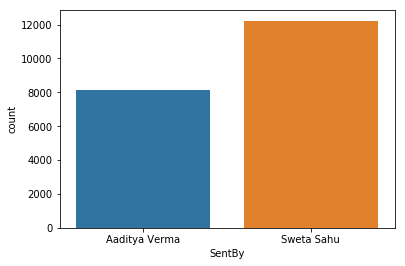

In [102]:
sns.countplot(df["SentBy"])

In [128]:
df[df["Message"].apply(lambda x: "🤣" in x)].count()

DateTime    338
SentBy      338
Message     338
dtype: int64